## Final Project Submission

Please fill out:
* Student name: Rashawn Wilkinson
* Student pace: Full-time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Importing Data & Packages 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tkinter as tk 
from dateutil.parser import parse

df=pd.read_csv('kc_house_data.csv', parse_dates=[1])

### Let's take a look at our data

In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Below, we have the column names follwed by their assocaited meaning
from the file, 'column_names.md'.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### Cleaning our data

In [3]:
df.info()
#We can see that the columns waterfront and yr_renovated have the largest amount of data missing. 
#view is also missing some data but nowhere near as much as the other two.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

The object data type of 'sqft_basement' may be a problem. 
For the sake of uniformity, we will set our object datatypes to floats and then set all integer values to floats.

In [4]:
df1=pd.DataFrame(df)

df1.sqft_basement= df1.sqft_basement.replace('?',0)

We have replaced the '?' values from the 'sqft_basement' column with 0.

In [5]:
df1['sqft_basement'].str.contains('\?').sum()

0

In [6]:
df1['sqft_basement']=pd.to_numeric(df1['sqft_basement'])

In [7]:
df1.isna().sum()
#We can see that the column waterfront is missing 2,376 entries
#yr_renovated is missing 3,842 entries 
#view is missing 63 entries

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#We will set the null values within waterfront to a value of 0 .
df1.waterfront=df.waterfront.fillna(0)
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


As we can see, there are no more null values within the column, 'waterfront'.

In [9]:
df1['waterfront'].unique()

array([0., 1.])

Next, we will fill the null values using the median values of the column, 'view'.

In [10]:
df1.view=df1.view.fillna(df1.view.median())

We can see that there are no more null values within the 'view' column.

In [11]:
df1['view'].isna().sum()

0

Lastly we will drop the columns, 'yr_renovated' and 'date', to clean up our dataframe. 

In [12]:
df1=df1.drop(columns='yr_renovated')
df1=df1.drop(columns='date')
df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [ ]:
sns.distplot(df1, hist=False)

It is important to note that 'df1' has a skewed distribution.

KeyboardInterrupt: 

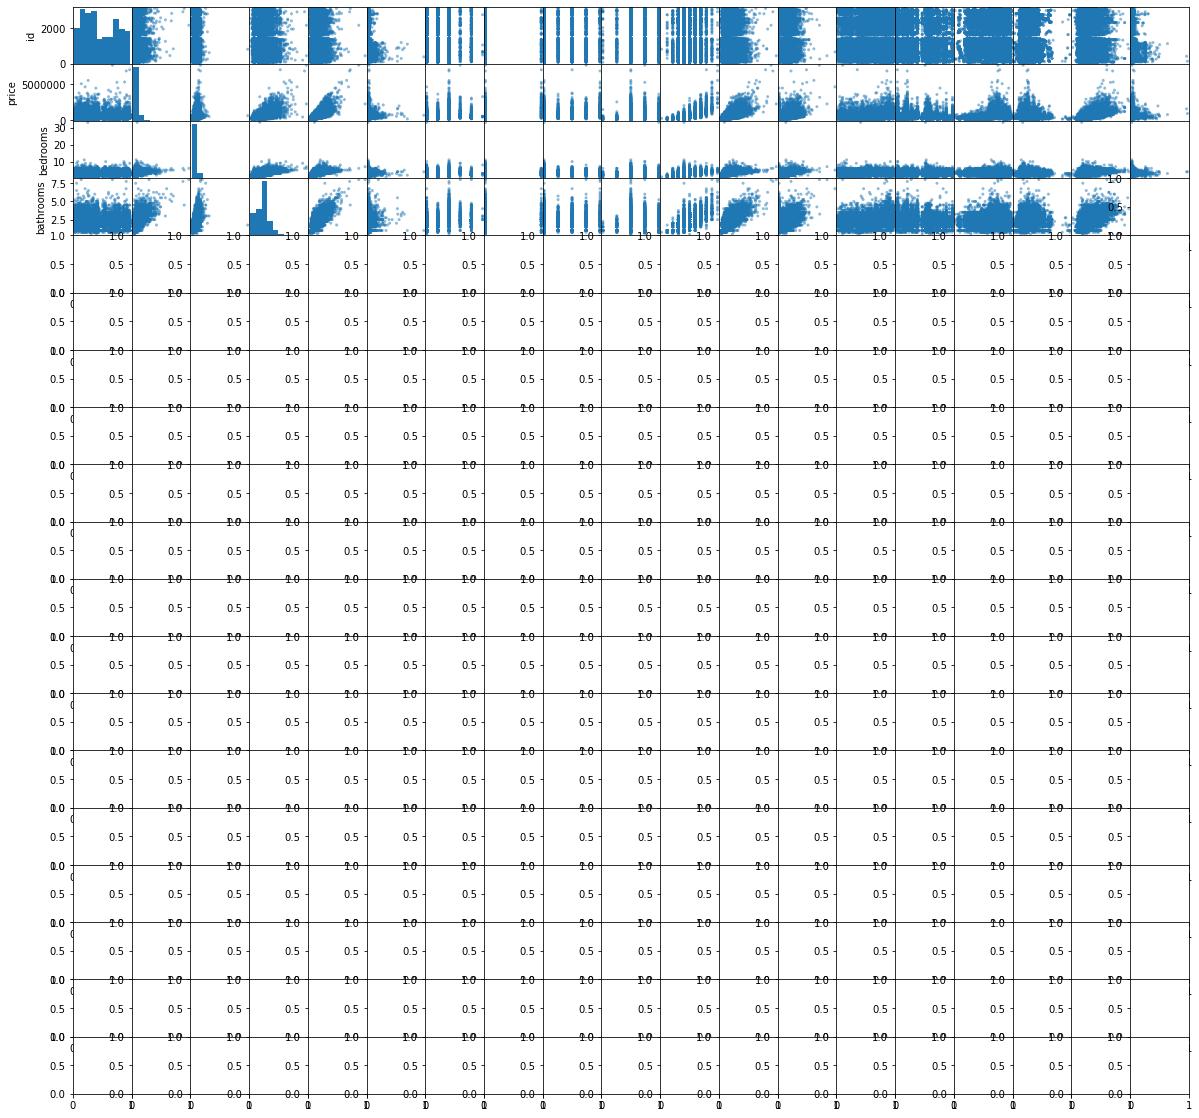

In [15]:
pd.plotting.scatter_matrix(df1,figsize = [20,20])
plt.show()

In [ ]:
df1.info()

Our dataframe is now cleaned and ready to be used in our model. 

It is important to note a few things with the data being used:
    1. The null values of 'waterfront' were assumed to be 0.
    2. The null values of 'view' were filled with the median values of the other entries in the 'view' column.
    3. The column, 'yr_renovated' was removed from the dataset we will be using for our model.
    4. We will

### Highly Correlated Features

In [16]:
#Let's get a glimpse at our highest correlated features.
high_corr=df1.corr()>0.75
display(high_corr)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


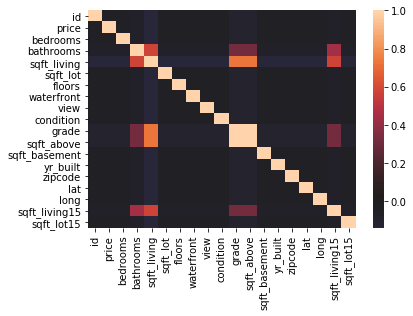

In [17]:
sns.heatmap(high_corr.corr(),center=0, robust=True)
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


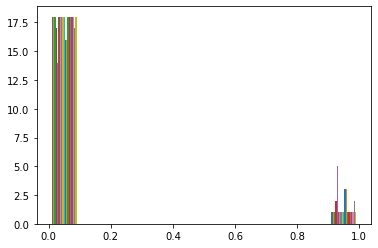

In [18]:
plt.hist(high_corr)
plt.show()

We can clearly see that a few values are highly correlated at values greater than 0.75

The following are the highest correlated columns:

sqft_living and bathrooms

grade and sqft_living

sqft_above and sqft_living

sqft_living and sqft_living15

sqft_above and grade


Now we will search for categorical values in our data.

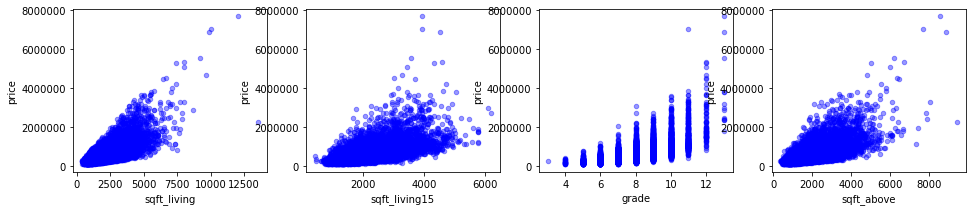

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living','sqft_living15', 'grade', 'sqft_above', 'bathrooms'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Our column, 'grade', apparently uses categorical values. We will need to account for this, before establishing our model.

In [21]:
df2=df1[['sqft_living','bathrooms','grade','sqft_above','sqft_living15','price']].copy()

In [23]:
#The'.get_dummies' method is crucial in making our categoricla data useful for modeling.
grade_dummy=pd.get_dummies(df1['grade'], prefix='grade')
df3=pd.concat([df2,grade_dummy], axis=1)
df3

,sqft_living,bathrooms,grade,sqft_above,sqft_living15,price,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1180,1.00,7,1180,1340,221900.0,0,0,0,0,1,0,0,0,0,0,0
1,2570,2.25,7,2170,1690,538000.0,0,0,0,0,1,0,0,0,0,0,0
2,770,1.00,6,770,2720,180000.0,0,0,0,1,0,0,0,0,0,0,0
3,1960,3.00,7,1050,1360,604000.0,0,0,0,0,1,0,0,0,0,0,0
4,1680,2.00,8,1680,1800,510000.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,8,1530,1530,360000.0,0,0,0,0,0,1,0,0,0,0,0
21593,2310,2.50,8,2310,1830,400000.0,0,0,0,0,0,1,0,0,0,0,0
21594,1020,0.75,7,1020,1020,402101.0,0,0,0,0,1,0,0,0,0,0,0
21595,1600,2.50,8,1600,1410,400000.0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
df3_mod=df3.drop(['grade'],axis=1)
df3_mod

,sqft_living,bathrooms,sqft_above,sqft_living15,price,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1180,1.00,1180,1340,221900.0,0,0,0,0,1,0,0,0,0,0,0
1,2570,2.25,2170,1690,538000.0,0,0,0,0,1,0,0,0,0,0,0
2,770,1.00,770,2720,180000.0,0,0,0,1,0,0,0,0,0,0,0
3,1960,3.00,1050,1360,604000.0,0,0,0,0,1,0,0,0,0,0,0
4,1680,2.00,1680,1800,510000.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,1530,1530,360000.0,0,0,0,0,0,1,0,0,0,0,0
21593,2310,2.50,2310,1830,400000.0,0,0,0,0,0,1,0,0,0,0,0
21594,1020,0.75,1020,1020,402101.0,0,0,0,0,1,0,0,0,0,0,0
21595,1600,2.50,1600,1410,400000.0,0,0,0,0,0,1,0,0,0,0,0


Our new DataFrame, 'df3_mod', has our categorized column, 'grade', accounted for.

<img src= 'df3_mod_pairplot.png'>

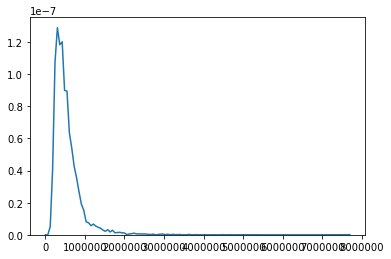

In [23]:
sns.distplot(df3_mod, hist=False)

Columns of 'df3_mod' will be the utilized in our first model.

### Model 1

In [27]:
#Let's take a look
df3_mod

,sqft_living,bathrooms,sqft_above,sqft_living15,price,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1180,1.00,1180,1340,221900.0,0,0,0,0,1,0,0,0,0,0,0
1,2570,2.25,2170,1690,538000.0,0,0,0,0,1,0,0,0,0,0,0
2,770,1.00,770,2720,180000.0,0,0,0,1,0,0,0,0,0,0,0
3,1960,3.00,1050,1360,604000.0,0,0,0,0,1,0,0,0,0,0,0
4,1680,2.00,1680,1800,510000.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2.50,1530,1530,360000.0,0,0,0,0,0,1,0,0,0,0,0
21593,2310,2.50,2310,1830,400000.0,0,0,0,0,0,1,0,0,0,0,0
21594,1020,0.75,1020,1020,402101.0,0,0,0,0,1,0,0,0,0,0,0
21595,1600,2.50,1600,1410,400000.0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
X1=df3_mod.drop(['price'],axis=1)
Y1=df3_mod['price']
x_int=sm.add_constant(X1)
model1=sm.OLS(Y1,x_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2241.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:04:07   Log-Likelihood:            -2.9770e+05
No. Observations:               21597   AIC:                         5.954e+05
Df Residuals:                   21582   BIC:                         5.955e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.631e+05   2.28e+04     24.708      0.000    5.18e+05    6.08e+05
sqft_living     214.4646      4.341     49.407      0.000     205.956     222.973
bathrooms     -7699.2823   3340.353     -2.305      0.021   -1.42e+04   -1151.944
sqft_above      -98.5570      4.261    -23.129      0.000    -106.909     -90.205
sqft_living15    24.8875      3.851      6.463      0.000      17.340      32.436
grade_3       -3.889e+05   2.15e+05     -1.807      0.071   -8.11e+05     3.3e+04
grade_4       -4.607e+05   4.65e+04     -9.907      0.000   -5.52e+05    -3.7e+05
grade_5       -4.581e+05   2.54e+04    -18.041      0.000   -5.08e+05   -4.08e+05
grade_6       -4.364e+05   2.18e+04    -20.054      0.000   -4.79e+05   -3.94e+05
grade_7       -4.117e+05   2.11e+04    -19.492      0.000   -4.53e+05    -3.7e+05
grade_8        -3.38e+05   2.11e+04    -16.043      0.000   -3.79e+05   -2.97e+05
grade_9       -1.972e+05   2.13e+04     -9.254      0.000   -2.39e+05   -1.55e+05
grade_10       8577.2167    2.2e+04      0.389      0.697   -3.46e+04    5.18e+04
grade_11       3.109e+05   2.42e+04     12.866      0.000    2.64e+05    3.58e+05
grade_12        8.55e+05    3.2e+04     26.712      0.000    7.92e+05    9.18e+05
grade_13        2.08e+06   6.44e+04     32.270      0.000    1.95e+06    2.21e+06
==============================================================================
Omnibus:                    14121.343   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535610.786
Skew:                           2.612   Prob(JB):                         0.00
Kurtosis:                      26.831   Cond. No.                     4.55e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our model is not accurate enough. We will attempt to boost the r-squared value by 
removing any features with a p-value over 0.05 and by using a log function.

In [28]:
X1=df3_mod.drop(['price','grade_3','grade_10'],axis=1)
Y1=df3_mod['price']
x_int=sm.add_constant(X1)
model1=sm.OLS(Y1,x_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2413.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:04:10   Log-Likelihood:            -2.9770e+05
No. Observations:               21597   AIC:                         5.954e+05
Df Residuals:                   21583   BIC:                         5.955e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.705e+05   1.45e+04     39.290      0.000    5.42e+05    5.99e+05
sqft_living     214.5286      4.341     49.421      0.000     206.020     223.037
bathrooms     -7644.3691   3340.339     -2.289      0.022   -1.42e+04   -1097.057
sqft_above      -98.4790      4.261    -23.111      0.000    -106.831     -90.127
sqft_living15    24.9438      3.851      6.477      0.000      17.396      32.492
grade_4       -4.684e+05   4.65e+04    -10.074      0.000    -5.6e+05   -3.77e+05
grade_5       -4.658e+05   1.84e+04    -25.275      0.000   -5.02e+05    -4.3e+05
grade_6       -4.441e+05   1.15e+04    -38.526      0.000   -4.67e+05   -4.22e+05
grade_7       -4.196e+05   9540.415    -43.976      0.000   -4.38e+05   -4.01e+05
grade_8       -3.459e+05   8738.972    -39.585      0.000   -3.63e+05   -3.29e+05
grade_9       -2.053e+05   8571.831    -23.954      0.000   -2.22e+05   -1.89e+05
grade_11       3.025e+05   1.39e+04     21.760      0.000    2.75e+05     3.3e+05
grade_12       8.464e+05   2.64e+04     32.040      0.000    7.95e+05    8.98e+05
grade_13       2.071e+06   6.64e+04     31.185      0.000    1.94e+06     2.2e+06
==============================================================================
Omnibus:                    14117.124   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534937.918
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      26.816   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 1: Regressive Model Validation

We will use test-train data to find our MSE (Mean Squared Error). 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
y_hat_train = linreg.predict(X_train)

TypeError: predict() missing 1 required positional argument: 'X'

In [38]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend()

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

We have pushed this model to it's limit. We will establish another model in hopes of having a higher r-squared value and a more accurate Test MSE.

### Model 2

For our second model, we will categorize 'zipcode' before testing our r-squared value.

In [45]:
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [46]:
zcode_dummy=pd.get_dummies(df1['zipcode'], prefix='zipcode')
df１_zcode=pd.concat([df1,zcode_dummy], axis=1)



In [47]:
X2 = df1_zcode.drop(['price','id','zipcode'], axis=1)
Y2 = df1_zcode['price']

X2_int = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2_int).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1061.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:54:24   Log-Likelihood:            -2.8960e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21511   BIC:                         5.801e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.392e+07   6.09e+06     -3.926      0.000   -3.59e+07    -1.2e+07
bedrooms      -2.739e+04   1545.302    -17.722      0.000   -3.04e+04   -2.44e+04
bathrooms      2.592e+04   2623.080      9.882      0.000    2.08e+04    3.11e+04
sqft_living     101.7647     14.540      6.999      0.000      73.266     130.264
sqft_lot          0.2395      0.039      6.202      0.000       0.164       0.315
floors        -4.333e+04   3170.911    -13.665      0.000   -4.95e+04   -3.71e+04
waterfront     6.889e+05   1.48e+04     46.629      0.000     6.6e+05    7.18e+05
view           5.665e+04   1748.289     32.406      0.000    5.32e+04    6.01e+04
condition      2.349e+04   1905.383     12.329      0.000    1.98e+04    2.72e+04
grade          5.836e+04   1831.497     31.867      0.000    5.48e+04     6.2e+04
sqft_above      106.3468     14.566      7.301      0.000      77.796     134.897
sqft_basement    28.7554     14.396      1.998      0.046       0.539      56.972
yr_built       -849.8636     61.926    -13.724      0.000    -971.244    -728.484
lat            2.062e+05   6.38e+04      3.234      0.001    8.12e+04    3.31e+05
long          -1.294e+05   4.58e+04     -2.825      0.005   -2.19e+05   -3.96e+04
sqft_living15     9.3130      2.901      3.210      0.001       3.627      14.999
sqft_lot15       -0.1322      0.061     -2.173      0.030      -0.251      -0.013
zipcode_98001 -4.973e+05   8.47e+04     -5.875      0.000   -6.63e+05   -3.31e+05
zipcode_98002 -4.629e+05   8.25e+04     -5.608      0.000   -6.25e+05   -3.01e+05
zipcode_98003 -5.214e+05   8.65e+04     -6.025      0.000   -6.91e+05   -3.52e+05
zipcode_98004  2.229e+05    8.9e+04      2.504      0.012    4.84e+04    3.97e+05
zipcode_98005 -2.484e+05   8.79e+04     -2.828      0.005   -4.21e+05   -7.62e+04
zipcode_98006 -2.685e+05   8.49e+04     -3.162      0.002   -4.35e+05   -1.02e+05
zipcode_98007 -3.014e+05    8.7e+04     -3.465      0.001   -4.72e+05   -1.31e+05
zipcode_98008 -2.936e+05   8.56e+04     -3.431      0.001   -4.61e+05   -1.26e+05
zipcode_98010 -3.966e+05    7.5e+04     -5.289      0.000   -5.44e+05    -2.5e+05
zipcode_98011 -4.596e+05   9.36e+04     -4.911      0.000   -6.43e+05   -2.76e+05
zipcode_98014 -4.174e+05   7.89e+04     -5.290      0.000   -5.72e+05   -2.63e+05
zipcode_98019 -4.539e+05   8.44e+04     -5.380      0.000   -6.19e+05   -2.89e+05
zipcode_98022 -4.556e+05   7.17e+04     -6.351      0.000   -5.96e+05   -3.15e+05
zipcode_98023 -5.437e+05   8.86e+04     -6.139      0.000   -7.17e+05    -3.7e+05
zipcode_98024 -3.478e+05   7.78e+04     -4.473      0.000      -5e+05   -1.95e+05
zipcode_98027 -3.452e+05      8e+04     -4.317      0.000   -5.02e+05   -1.88e+05
zipcode_98028 -4.671e+05    9.5e+04     -4.916      0.000   -6.53e+05   -2.81e+05
zipcode_98029 -3.062e+05   7.97e+04     -3.843   

Once again, we will attempt to boost the r-squared value
by removing any features with a p-value over 0.05 and by using a log function.

In [48]:
x = df1_zcode.drop(['price','id','zipcode','zipcode_98040','zipcode_98102'], axis=1)
y = df1_zcode['price']

x_int = sm.add_constant(x)
model2 = sm.OLS(y,x_int).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:54:26   Log-Likelihood:            -2.8961e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21512   BIC:                         5.801e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.142e+07   5.91e+06     -3.624      0.000    -3.3e+07   -9.84e+06
bedrooms      -2.733e+04   1544.815    -17.691      0.000   -3.04e+04   -2.43e+04
bathrooms      2.588e+04   2622.951      9.866      0.000    2.07e+04     3.1e+04
sqft_living     101.5026     14.539      6.981      0.000      73.005     130.000
sqft_lot          0.2392      0.039      6.193      0.000       0.163       0.315
floors        -4.385e+04   3149.743    -13.920      0.000      -5e+04   -3.77e+04
waterfront     6.893e+05   1.48e+04     46.667      0.000     6.6e+05    7.18e+05
view            5.67e+04   1748.045     32.435      0.000    5.33e+04    6.01e+04
condition      2.362e+04   1903.310     12.408      0.000    1.99e+04    2.73e+04
grade          5.827e+04   1830.398     31.836      0.000    5.47e+04    6.19e+04
sqft_above      106.7602     14.563      7.331      0.000      78.215     135.306
sqft_basement    28.9095     14.395      2.008      0.045       0.693      57.126
yr_built       -841.1005     61.612    -13.651      0.000    -961.866    -720.335
lat             1.86e+05   6.21e+04      2.994      0.003    6.42e+04    3.08e+05
long          -1.164e+05   4.48e+04     -2.595      0.009   -2.04e+05   -2.85e+04
sqft_living15     9.6094      2.893      3.321      0.001       3.939      15.280
sqft_lot15       -0.1329      0.061     -2.184      0.029      -0.252      -0.014
zipcode_98001 -4.628e+05   2.08e+04    -22.208      0.000   -5.04e+05   -4.22e+05
zipcode_98002  -4.29e+05   2.21e+04    -19.445      0.000   -4.72e+05   -3.86e+05
zipcode_98003 -4.862e+05   2.13e+04    -22.831      0.000   -5.28e+05   -4.44e+05
zipcode_98004  2.627e+05   1.27e+04     20.676      0.000    2.38e+05    2.88e+05
zipcode_98005 -2.093e+05   1.56e+04    -13.393      0.000    -2.4e+05   -1.79e+05
zipcode_98006 -2.308e+05    1.2e+04    -19.291      0.000   -2.54e+05   -2.07e+05
zipcode_98007 -2.625e+05   1.69e+04    -15.555      0.000   -2.96e+05   -2.29e+05
zipcode_98008  -2.55e+05   1.44e+04    -17.710      0.000   -2.83e+05   -2.27e+05
zipcode_98010 -3.651e+05   2.56e+04    -14.288      0.000   -4.15e+05   -3.15e+05
zipcode_98011  -4.17e+05   1.83e+04    -22.806      0.000   -4.53e+05   -3.81e+05
zipcode_98014 -3.809e+05   2.58e+04    -14.747      0.000   -4.32e+05    -3.3e+05
zipcode_98019 -4.148e+05   2.26e+04    -18.317      0.000   -4.59e+05    -3.7e+05
zipcode_98022 -4.266e+05   2.79e+04    -15.304      0.000   -4.81e+05   -3.72e+05
zipcode_98023 -5.079e+05   2.14e+04    -23.778      0.000    -5.5e+05   -4.66e+05
zipcode_98024 -3.129e+05   2.52e+04    -12.403      0.000   -3.62e+05   -2.63e+05
zipcode_98027 -3.093e+05    1.5e+04    -20.642      0.000   -3.39e+05    -2.8e+05
zipcode_98028 -4.239e+05   1.68e+04    -25.211      0.000   -4.57e+05   -3.91e+05
zipcode_98029 -2.699e+05   1.65e+04    -16.357   

In [ ]:
sns.barplot(x=x, y=y, palette="rocket")
plt.show()

In [49]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our second model has a great r-squared value.

In [ ]:
sns.set_context("paper", font_scale=0.9)  
df1_zcode_pairplot=sns.pairplot(df1_zcode,height=10, aspect=0.6)
plt.savefig('df_zcode_pairplot')
plt.show()


#### Model 2: Regressive Model Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=43)
y_hat_train = linreg.predict(X_train)

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend()

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

This model has a closer MSE between our train and test data.

### Model 3

We will try a third model that harbors all categorical values used in the first two models.

In [ ]:
#Given that this model will have the combined data from our last two models, our r-squared value should be higher
df4.reset_index(drop=True, inplace=True)
grade_dummy.reset_index(drop=True,inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df4=pd.concat([df1_zcode,grade_dummy], axis=1)
df4.head(10)

In [ ]:
X3=df4.drop(['price','id','zipcode','grade'], axis=1)
Y3=df4['price']
X3_int = sm.add_constant(X3)
model3 = sm.OLS(Y3,X3_int).fit()
model3.summary()

In [ ]:
sns.barplot(x=X3, y=Y3, palette="rocket")
plt.show()

Our third model has an even better r-squared value than our second model.

#### Model 3: Regressive Model Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=45)

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend()

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Despite some inaccuracies in our test-train visualization, our r-squared value and MSE's are in good shape.

## Conclusion
We cleaned and processed our data. Then we made three suggestive models with visualizations, using our inital dataset 'kc_house_data.csv'